In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("C:\\Users\\HDC0422072\\Downloads\\california_housing_train.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
xpoints = df["longitude"].values.reshape(-1, 1)
ypoints = df["population"].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(xpoints, ypoints, test_size=0.1, random_state=42)
degree = 2 
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [7]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)


LinearRegression()

In [8]:
ypoints_pred = poly_reg.predict(x_test_poly)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, ypoints_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1040.2646779106096


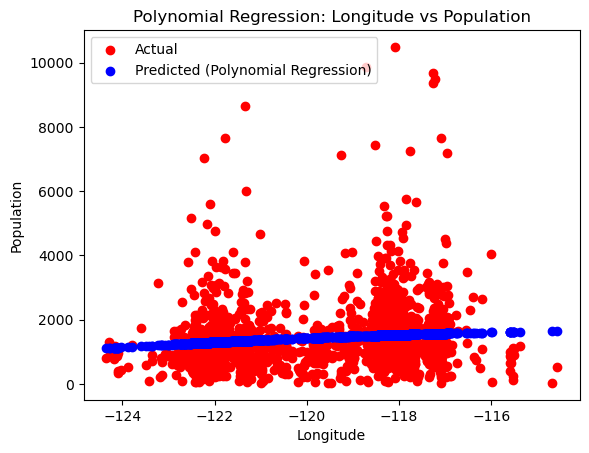

In [10]:
plt.scatter(x_test, y_test, color="red", label="Actual")
plt.scatter(x_test, ypoints_pred, color="blue", label="Predicted (Polynomial Regression)")
plt.xlabel("Longitude")
plt.ylabel("Population")
plt.title("Polynomial Regression: Longitude vs Population")
plt.legend()
plt.show()